In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import json


## Drawing of square obstacles

In [2]:
class square:
    def __init__(self, tl, br):
        self.top_left = tl
        self.bottom_right = br
        self.transform()
        
    def transform(self):
        self.ll = [self.top_left[0], self.bottom_right[1]]
        self.width = self.bottom_right[0] - self.top_left[0]
        self.height = self.top_left[1] - self.bottom_right[1]
        

obs1 = square([1,9], [3,7])
obs2 = square([9,3], [10,-10])
obs3 = square([2,0], [4,-3])
obs4 = square([8,9], [9,7])

obses = [obs1, obs2, obs3, obs4]



## Initial configuration and load results

In [3]:
play_ground = square([0,10], [10,-10])
start = [5,-9]
goal = [0,10]
path_rrt = np.loadtxt('build/unit_tests/path.csv')
path_rrt_star = np.loadtxt('build/unit_tests/path_star.csv')
# print(path)
with open('build/unit_tests/rrt.json', 'r') as js:
    rrt_tree = json.load(js)
with open('build/unit_tests/rrt_star.json', 'r') as js:
    rrt_star_tree = json.load(js)


## Function to plot rrt tree

In [4]:
def plot_rrt(tree):
    for index, node in tree.items():
        node['value'][0]
        plt.scatter(node['value'][0], node['value'][1], c=3, s=5, marker='.')
        if(node['parent']!=0):
            plt.plot([node['value'][0], node['parent'][0]], [node['value'][1], node['parent'][1]], '--g')
        

## Function to plot path

In [5]:
def plot_path(play_ground, obses, start, goal, path):
    fig, ax = plt.subplots(figsize=[15,12])
    ax.add_patch(pat.Rectangle(play_ground.ll, play_ground.width, play_ground.height, fill=False))
    for obs in obses:
        ax.add_patch(pat.Rectangle(obs.ll, obs.width, obs.height))

    plt.scatter(start[0], start[1], c=3, s=80, marker='*')
    plt.scatter(goal[0], goal[1], c=3, s=80, marker='*')
    plt.plot(path[:,0], path[:,1], '-r', linewidth=4)


## Visualize of RRT

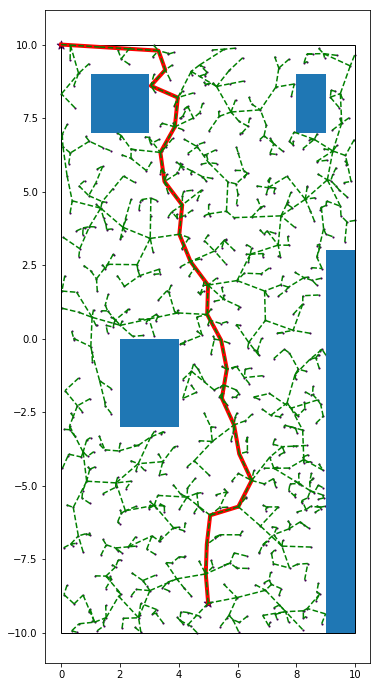

In [6]:
plot_path(play_ground, obses, start, goal, path_rrt)
plot_rrt(rrt_tree)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()




## Visulize RRT*

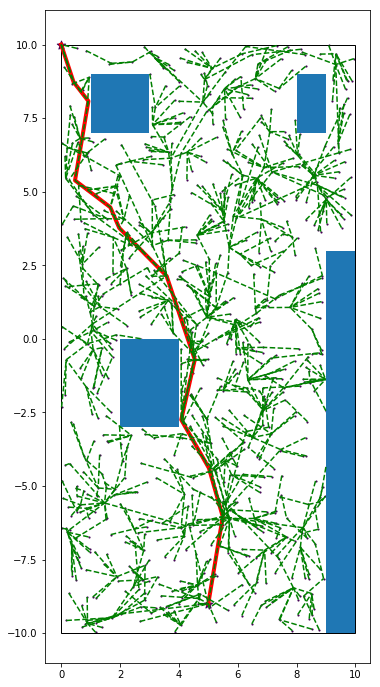

In [7]:
plot_path(play_ground, obses, start, goal, path_rrt_star)
plot_rrt(rrt_star_tree)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


## Visulize steps

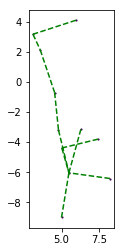

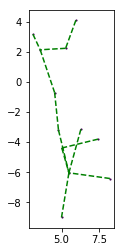

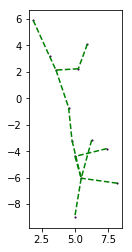

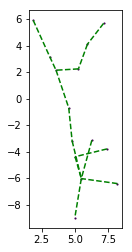

In [8]:
with open('build/unit_tests/10.json', 'r') as js:
    f_step1 = json.load(js)
with open('build/unit_tests/11.json', 'r') as js:
    f_step2 = json.load(js)
with open('build/unit_tests/12.json', 'r') as js:
    f_step3 = json.load(js)
with open('build/unit_tests/13.json', 'r') as js:
    f_step4 = json.load(js)
plt.figure()
plot_rrt(f_step1)
plt.gca().set_aspect('equal', adjustable='box')
plt.figure()
plot_rrt(f_step2)
plt.gca().set_aspect('equal', adjustable='box')
plt.figure()
plot_rrt(f_step3)
plt.gca().set_aspect('equal', adjustable='box')
plt.figure()
plot_rrt(f_step4)
plt.gca().set_aspect('equal', adjustable='box')